<a href="https://colab.research.google.com/github/Ayreslog/Analise-Combustivel/blob/main/Arquivo%20principal%20e%20datasets/projetoemgrupo4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Relatório da Agência Nacional de Petróleo, Gás Natural e Biocombustíveis (ANP)**

Faremos um levantamento sobre os preços dos combustíveis nos meses de "Junho e julho de 2025" para a Agência Nacional de Petróleo, Gás Natural e Biocombustíveis (ANP) nas diferentes regiões do Brasil, os dados foram coletados do site  (https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/serie-historica-de-precos-de-combustiveis) para fazer uma análise exploratória relacionada à série histórica de preço de venda da gasolina e do etanol.

<font size=5><a name="indice"></a> Análise deve responder às seguintes perguntas:

- [1. Como se comportaram o preço dos combustíveis durante os dois meses citados? Os valores do etanol e da gasolina tiveram uma tendência de queda ou alta?](#section_1)

- [2. Qual o preço médio da gasolina e do etanol nesses dois meses?](#section_2)
- [3. Quais os 5 estados com o preço médio da gasolina e do etanol mais caros?](#section_3)
- [Pergunta extra 1. O que justifica a média dos preços dos estados do norte serem mais caras que o restante das regiões?](#section_4)
- [4. Qual o preço médio da gasolina e do etanol por estado?](#section_5)
- [5. Qual o município que possui o menor preço para a gasolina e para o etanol?](#section_6)
- [6. Qual o município que possui o maior preço para a gasolina e para o etanol?](#section_7)
- [7. Qual a região que possui o maior valor médio da gasolina?](#section_8)
- [8. Qual a região que possui o menor valor médio do etanol?](#section_9)
- [9. Há alguma correlação entre o valor do combustível (gasolina e etanol) e a região onde ele é vendido?](#section_10)
- [10. Há alguma correlação entre o valor do combustível (gasolina e etanol) e a bandeira que vende ele?](#section_11)
- [Pergunta extra 2. Qual a Bandeira que possui o maior preço para a gasolina e para o etanol?](#section_12)

Acompanhar os preços dos combustíveis é de grande importância por que afeta o dia a dia do cidadão brasileiro
como alimentos, preços de viagens, fretes entre outros fatores.

In [2]:
# Importando as bibliotecas.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Carregar o dataset dos preços da gasolina e etanol mês de maio.
precos_gaso_et5 = pd.read_csv('https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2025/precos-gasolina-etanol-06.csv', sep=';')
display(precos_gaso_et5)


,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,N,AP,MACAPA,AUTOMOTO - AUTOMOVEIS DO AMAPA LTDA,03.659.452/0006-82,RUA CICERO MARQUES DE SOUZA,3134,NaN,NOVO HORIZONTE,68909-803,GASOLINA,02/06/2025,"6,02",NaN,R$ / litro,BRANCA
1,N,AP,MACAPA,AUTOMOTO - AUTOMOVEIS DO AMAPA LTDA,03.659.452/0003-30,RUA CLAUDOMIRO DE MORAES,1130,NaN,NOVO BURITIZAL,68904-000,GASOLINA,02/06/2025,"6,02",NaN,R$ / litro,BRANCA
2,N,AP,MACAPA,AUTOMOTO - AUTOMOVEIS DO AMAPA LTDA,03.659.452/0004-10,AVENIDA VIOLETA MONT'ALVERNE MOREIRA,275,NaN,CONGOS,68900-000,GASOLINA,02/06/2025,"6,02",NaN,R$ / litro,BRANCA
3,N,AP,MACAPA,SEPE TIARAJU EMPREENDIMENTOS LTDA,05.297.501/0002-86,RUA SETENTRIONAL,S/N,ESQUINA COM BEIRA RIO,ARAXÁ,68903-640,GASOLINA,02/06/2025,"6,04",NaN,R$ / litro,BRANCA
4,N,AP,MACAPA,SEPE TIARAJU EMPREENDIMENTOS LTDA,05.297.501/0002-86,RUA SETENTRIONAL,S/N,ESQUINA COM BEIRA RIO,ARAXÁ,68903-640,GASOLINA ADITIVADA,02/06/2025,"6,14",NaN,R$ / litro,BRANCA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49971,NE,BA,SERRINHA,COMERCIO DE COMBUSTIVEIS VEREDAS LTDA,54.003.912/0001-46,RODOVIA BA 409,151 A,QUADRAD LOTE 09,NOVO HORIZONTE - 01,48700-000,GASOLINA ADITIVADA,30/06/2025,"5,99",NaN,R$ / litro,BRANCA
49972,NE,BA,SERRINHA,COMERCIO DE COMBUSTIVEIS VEREDAS LTDA,54.003.912/0001-46,RODOVIA BA 409,151 A,QUADRAD LOTE 09,NOVO HORIZONTE - 01,48700-000,ETANOL,30/06/2025,"4,65",NaN,R$ / litro,BRANCA
49973,S,RS,ALVORADA,POSTO DE COMBUSTIVEIS DEA LTDA,03.299.835/0002-63,AVENIDA PRES GETULIO VARGAS,2725,NaN,MARINGA,94810-002,GASOLINA,30/06/2025,"6,05",NaN,R$ / litro,BRANCA
49974,S,RS,ALVORADA,POSTO DE COMBUSTIVEIS DEA LTDA,03.299.835/0002-63,AVENIDA PRES GETULIO VARGAS,2725,NaN,MARINGA,94810-002,GASOLINA ADITIVADA,30/06/2025,"6,15",NaN,R$ / litro,BRANCA


In [8]:
# Filtrar dados da gasolina e etanol do mês de junho.
precos_gaso_et6 = pd.read_csv('https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2025/precos-gasolina-etanol-07.csv', sep=';')
display(precos_gaso_et6)

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,NE,AL,ARAPIRACA,AUTO POSTO M M GARROTE LTDA,08.738.994/0001-50,RODOVIA AL-220,5848,KM 96,BOM SUCESSO,57309-035,GASOLINA,01/07/2025,"6,15",NaN,R$ / litro,VIBRA
1,NE,AL,ARAPIRACA,AUTO POSTO M M GARROTE LTDA,08.738.994/0001-50,RODOVIA AL-220,5848,KM 96,BOM SUCESSO,57309-035,ETANOL,01/07/2025,"4,79",NaN,R$ / litro,VIBRA
2,NE,AL,ARAPIRACA,AUTO POSTO MASSARANDUBA LTDA,07.248.398/0001-29,RODOVIA AL 220,4698,NaN,PLANALTO,57308-000,GASOLINA,01/07/2025,"5,89",NaN,R$ / litro,BRANCA
3,NE,AL,ARAPIRACA,AUTO POSTO MASSARANDUBA LTDA,07.248.398/0001-29,RODOVIA AL 220,4698,NaN,PLANALTO,57308-000,GASOLINA ADITIVADA,01/07/2025,"5,99",NaN,R$ / litro,BRANCA
4,NE,AL,ARAPIRACA,AUTO POSTO MASSARANDUBA LTDA,07.248.398/0001-29,RODOVIA AL 220,4698,NaN,PLANALTO,57308-000,ETANOL,01/07/2025,"4,98",NaN,R$ / litro,BRANCA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45176,SE,MG,MURIAE,POSTO DIAMANTE MASTER LTDA,05.520.520/0001-49,AVENIDA MAESTRO SANSAO,29,QUADRA03,CENTRO,36880-002,GASOLINA,31/07/2025,"6,49",NaN,R$ / litro,IPIRANGA
45177,SE,MG,MURIAE,POSTO DIAMANTE MASTER LTDA,05.520.520/0001-49,AVENIDA MAESTRO SANSAO,29,QUADRA03,CENTRO,36880-002,GASOLINA ADITIVADA,31/07/2025,"6,49",NaN,R$ / litro,IPIRANGA
45178,SE,MG,MURIAE,POSTO DIAMANTE MASTER LTDA,05.520.520/0001-49,AVENIDA MAESTRO SANSAO,29,QUADRA03,CENTRO,36880-002,ETANOL,31/07/2025,"4,59",NaN,R$ / litro,IPIRANGA
45179,NE,BA,FEIRA DE SANTANA,AUTO POSTO ORIGINAL LTDA,44.182.247/0001-41,RUA DOUTOR MACARIO CERQUEIRA,313,NaN,MUCHILA,44005-000,GASOLINA,31/07/2025,"5,99",NaN,R$ / litro,VIBRA


## Realizando tratamento de dados, verificando valores nulos e removendo colunas que não serão úteis à análise.

In [9]:
# Transformando strings em números flutuantes.
precos_gaso_et5['Valor de Venda'] = precos_gaso_et5['Valor de Venda'].str.replace(',', '.').astype(float)
precos_gaso_et6['Valor de Venda'] = precos_gaso_et6['Valor de Venda'].str.replace(',', '.').astype(float)

In [10]:
# Concatenar as tabelas e juntas os indices.
tabelas_preco_gasol_etan = pd.concat([precos_gaso_et5, precos_gaso_et6], ignore_index=True)

In [11]:
# Analisando a quantidades de espaços faltantes(NaN) por colunas.
valores_nulos = tabelas_preco_gasol_etan.isna().sum()
valores_nulos

,0
Regiao - Sigla,0
Estado - Sigla,0
Municipio,0
Revenda,0
CNPJ da Revenda,0
Nome da Rua,0
Numero Rua,12
Complemento,74551
Bairro,175
Cep,0


- Identifica linhas com valores nulos. Assim podemos colocar outros valores ou eliminar a coluna se não for alterar os dados.

In [12]:
# Deletando colunas usando o drop para fazer a limpeza adequada da tabela.
tabelas_preco_gasol_etan2 = tabelas_preco_gasol_etan.drop(columns=['Revenda','CNPJ da Revenda','Valor de Compra','Nome da Rua','Numero Rua','Complemento','Cep','Unidade de Medida'])


- Foram deletadas algumas colunas que não possui muito impacto na resposta do relatório para os preços dos combustíveis em diferentes regiões, alguns valores nulos muito grande e outros que não possui um foco para as pergunta do relatório.


In [13]:
# Renomear nomes das colunas
tabelas_preco_gasol_etan3 = tabelas_preco_gasol_etan2.rename(columns=lambda x: x.replace('Regiao - Sigla', 'Sigla_Regiao').replace('Estado - Sigla','Sigla_Estado').replace('Data da Coleta','Data_da_Coleta').replace('Valor de Venda','Valor_de_Venda',))
tabelas_preco_gasol_etan3

,Sigla_Regiao,Sigla_Estado,Municipio,Bairro,Produto,Data_da_Coleta,Valor_de_Venda,Bandeira
0,N,AP,MACAPA,NOVO HORIZONTE,GASOLINA,02/06/2025,6.02,BRANCA
1,N,AP,MACAPA,NOVO BURITIZAL,GASOLINA,02/06/2025,6.02,BRANCA
2,N,AP,MACAPA,CONGOS,GASOLINA,02/06/2025,6.02,BRANCA
3,N,AP,MACAPA,ARAXÁ,GASOLINA,02/06/2025,6.04,BRANCA
4,N,AP,MACAPA,ARAXÁ,GASOLINA ADITIVADA,02/06/2025,6.14,BRANCA
...,...,...,...,...,...,...,...,...
95152,SE,MG,MURIAE,CENTRO,GASOLINA,31/07/2025,6.49,IPIRANGA
95153,SE,MG,MURIAE,CENTRO,GASOLINA ADITIVADA,31/07/2025,6.49,IPIRANGA
95154,SE,MG,MURIAE,CENTRO,ETANOL,31/07/2025,4.59,IPIRANGA
95155,NE,BA,FEIRA DE SANTANA,MUCHILA,GASOLINA,31/07/2025,5.99,VIBRA


<a name='section_1'></a>
<font size=6> 1. Como se comportaram o preço dos combustíveis durante os dois meses citados? Os valores do etanol e da gasolina tiveram uma tendência de queda ou alta?


- Calculando a média diária dos combustíveis do mês de junho

In [14]:
## Adicionar dias da semana que faltam e preencher os valores com a média de cada combustível
# Filtrar os dados e criar dicionário
df_gasolina = precos_gaso_et5[precos_gaso_et5['Produto'] == 'GASOLINA']
df_gasolina_adtv = precos_gaso_et5[precos_gaso_et5['Produto'] == 'GASOLINA ADITIVADA']
df_etanol = precos_gaso_et5[precos_gaso_et5['Produto'] == 'ETANOL']

produto_dfs = {
    'GASOLINA': df_gasolina,
    'GASOLINA ADITIVADA': df_gasolina_adtv,
    'ETANOL': df_etanol
}

# adicionar datas que faltam
datas_faltantes = ['07/06/2025', '08/06/2025', '14/06/2025', '15/06/2025',
                   '21/06/2025', '22/06/2025', '28/06/2025', '29/06/2025']

# Converter as datas para datetime
datas_faltantes = pd.to_datetime(datas_faltantes, format='%d/%m/%Y')

# Calcular Valor de Venda
media_valores = {}
for produto, df in produto_dfs.items():
    media_valores[produto] = df.groupby('Data da Coleta')['Valor de Venda'].mean().round(2)

# DataFrame com as médias dos combustíveis, adicionar datas faltantes e preencher valores nulos com as médias
df_media_valores = pd.DataFrame(media_valores)
df_media_valores.index = pd.to_datetime(df_media_valores.index, format='%d/%m/%Y')
df_final = pd.concat([df_media_valores, pd.DataFrame(index=datas_faltantes)], axis=0)
df_final = df_final.sort_index()
df_final.fillna(df_final.mean().round(2), inplace=True)

# Formatar as datas no formato "dia-mes-ano"
df_final.index = df_final.index.strftime('%d-%m-%Y')


- Calculando a média diária dos combustíveis do mês de Julho

In [15]:
## Adicionar dias da semana que faltam e preencher os valores com a média de cada combustível
# Filtrar os dados e criar dicionário
df_gasolina2 = precos_gaso_et6[precos_gaso_et6['Produto'] == 'GASOLINA']
df_gasolina_adtv2 = precos_gaso_et6[precos_gaso_et6['Produto'] == 'GASOLINA ADITIVADA']
df_etanol2 = precos_gaso_et6[precos_gaso_et6['Produto'] == 'ETANOL']

produto_dfs_junho = {
    'GASOLINA': df_gasolina2,
    'GASOLINA ADITIVADA': df_gasolina_adtv2,
    'ETANOL': df_etanol2
}

# adicionar datas que faltam
datas_faltantes2 = ['05/07/2025', '06/07/2025', '12/07/2025', '13/07/2025',
                   '19/07/2025', '20/07/2025', '26/07/2025', '27/07/2025']

# Converter as datas para datetime
datas_faltantes2 = pd.to_datetime(datas_faltantes2, format='%d/%m/%Y')

# Calcular Valor de Venda
media_valores_junho = {}
for produto2, df2 in produto_dfs_junho.items():
    media_valores_junho[produto2] = df2.groupby('Data da Coleta')['Valor de Venda'].mean().round(2)

# DataFrame com as médias dos combustíveis, adicionar datas faltantes e preencher valores nulos com as médias
df_media_valores2 = pd.DataFrame(media_valores_junho)
df_media_valores2.index = pd.to_datetime(df_media_valores2.index, format='%d/%m/%Y')
df_final2 = pd.concat([df_media_valores2, pd.DataFrame(index=datas_faltantes2)], axis=0)
df_final2 = df_final2.sort_index()
df_final2.fillna(df_final2.mean().round(2), inplace=True)

# Formatar as datas no formato "dia-mes-ano"
df_final2.index = df_final2.index.strftime('%d-%m-%Y')

In [44]:
# concatenando os dois dataframes
dfs_concatenados = pd.concat([df_final, df_final2])
dfs_concatenados

,GASOLINA,GASOLINA ADITIVADA,ETANOL
02-06-2025,6.22,6.43,4.43
03-06-2025,6.30,6.50,4.45
04-06-2025,6.21,6.40,4.46
05-06-2025,6.32,6.51,4.47
06-06-2025,6.32,6.46,4.58
...,...,...,...
27-07-2025,6.22,6.42,4.37
28-07-2025,6.20,6.42,4.38
29-07-2025,6.15,6.37,4.24
30-07-2025,6.16,6.35,4.37


* Para realizar a criação dos gráficos abaixo, este DataFrame foi criado filtrando as datas do mês e realizando as médias do Valor de Vendas  dos combustíveis em cada uma delas.

* Também foram preenchidas as datas faltantes que correspondem aos fins de semanas, pois como detetermina "O art. 3º da Resolução ANP nº 868/2022 estabelece que os dados deverão ser enviados em dias úteis. Além disso, de acordo com o art. 4º da Resolução, os dados de estoque em tanque referentes aos dias não úteis devem ser enviados no primeiro dia útil subsequente, com a indicação da data de referência do fechamento do estoque."

* Para preencher os valores correspondentes às datas faltantes, foi realizado o cálculo da média dos preços de cada um dos combustíveis e completados os espaços com tais valores para evitar distorções e manter a aproximação dos números.

/tmp/ipython-input-1646573447.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/tmp/ipython-input-1646573447.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/tmp/ipython-input-1646573447.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


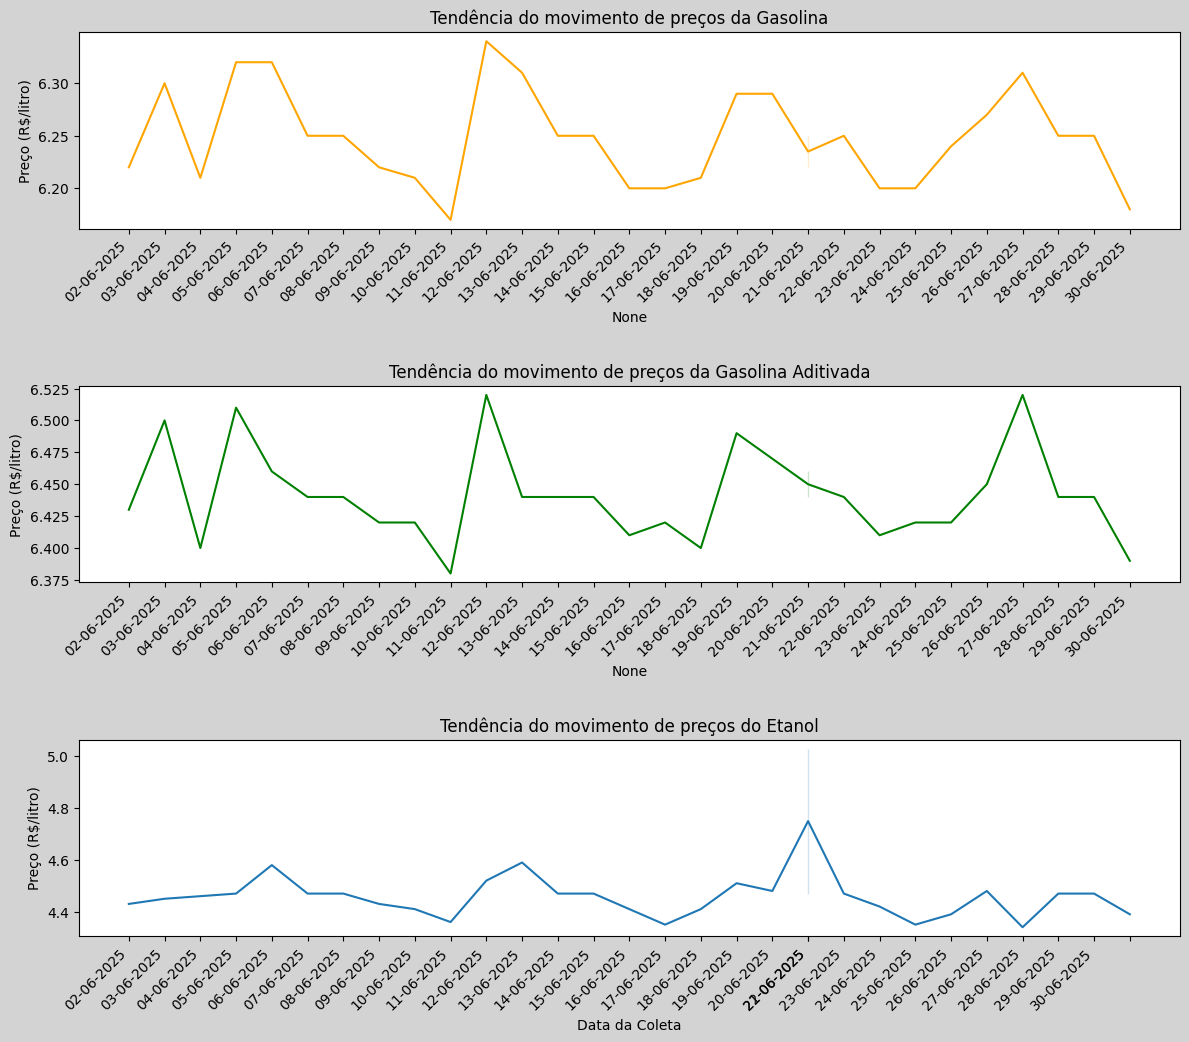

In [17]:
# Criar os subplots emparelhando os gráficos
fig, axes = plt.subplots(nrows=3, figsize=(12, 10))

# Gráfico Gasolina
sns.lineplot(data=df_final, x=df_final.index, y='GASOLINA', ax=axes[0], color='orange')
axes[0].set_title('Tendência do movimento de preços da Gasolina')
axes[0].set_ylabel('Preço (R$/litro)')

# Gráfico Gasolina Aditivada
sns.lineplot(data=df_final, x=df_final.index, y='GASOLINA ADITIVADA', ax=axes[1], color='green')
axes[1].set_title('Tendência do movimento de preços da Gasolina Aditivada')
axes[1].set_ylabel('Preço (R$/litro)')

# Gráfico Etanol
sns.lineplot(data=df_final, x=df_final.index, y='ETANOL', ax=axes[2])
axes[2].set_title('Tendência do movimento de preços do Etanol')
axes[2].set_xlabel('Data da Coleta')
axes[2].set_ylabel('Preço (R$/litro)')

plt.tight_layout()

# Rotacionar rótulos de data
for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Espaçamento
plt.subplots_adjust(hspace=0.8)

# Alterar a cor do fundo
fig.patch.set_facecolor('lightgray')

# Mostrar os gráficos
plt.xticks(df_final.index, rotation=45)
plt.show()



ANÁLISE DO GRÁFICO MÊS DE JUNHO
- Neste gráfico será analisado o movimento dos preços dentro de um recorte para visualização
detalhada dos valores, assim não foi necessário a inicialização do eixo y no 0;

- Durante o mês de junho, os combustíveis apresentaram variações perceptíveis nos preços:

- Gasolina Comum: registrou seu pico em 12/06, chegando a 6,34. O valor mais baixo foi em 11/06, a 6,17. Fechou o mês em 6,18.

- Gasolina Aditivada: alcançou o valor máximo em 12/06 e 27/06, em torno de 6,52. O menor preço foi em 11/06, 6,38. Encerrando junho em R$ 6,39.

- Etanol: apresentou maior oscilação. Teve seu valor mais alto em 21/06, a 5,03, e o mais baixo em 10/06, a 4,41. No fechamento do mês, em 30/06, estava em 4,39.

Apesar das oscilações ao longo das semanas, observa-se uma tendência geral de leve queda nos três combustíveis ao final de junho, especialmente na gasolina comum e no etanol, que não sustentaram seus picos.

/tmp/ipython-input-3113266589.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/tmp/ipython-input-3113266589.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/tmp/ipython-input-3113266589.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


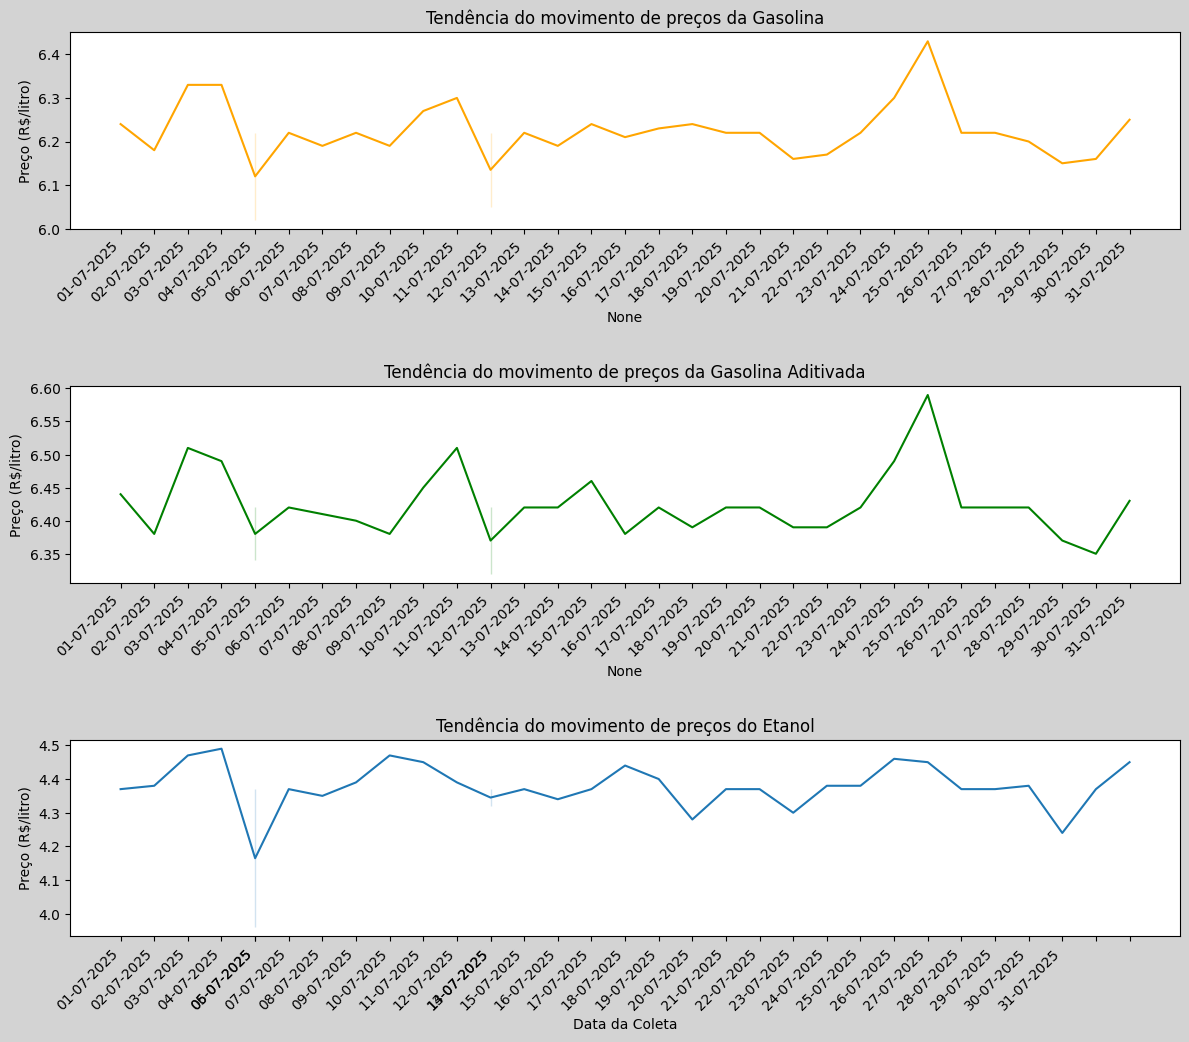

In [18]:
# Criar os subplots emparelhando os gráficos
fig, axes = plt.subplots(nrows=3, figsize=(12, 10))

# Gráfico Gasolina
sns.lineplot(data=df_final2, x=df_final2.index, y='GASOLINA', ax=axes[0], color='orange')
axes[0].set_title('Tendência do movimento de preços da Gasolina')
axes[0].set_ylabel('Preço (R$/litro)')

# Gráfico Gasolina Aditivada
sns.lineplot(data=df_final2, x=df_final2.index, y='GASOLINA ADITIVADA', ax=axes[1], color='green')
axes[1].set_title('Tendência do movimento de preços da Gasolina Aditivada')
axes[1].set_ylabel('Preço (R$/litro)')

# Gráfico Etanol
sns.lineplot(data=df_final2, x=df_final2.index, y='ETANOL', ax=axes[2])
axes[2].set_title('Tendência do movimento de preços do Etanol')
axes[2].set_xlabel('Data da Coleta')
axes[2].set_ylabel('Preço (R$/litro)')

plt.tight_layout()

# Rotacionar rótulos de data
for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Espaçamento
plt.subplots_adjust(hspace=0.8)

# Alterar a cor do fundo
fig.patch.set_facecolor('lightgray')

# Mostrar os gráficos
plt.xticks(df_final2.index, rotation=45)
plt.show()

📊 ANÁLISE DO GRÁFICO – MÊS DE JULHO

Neste gráfico é analisado o movimento dos preços dentro de um recorte mensal para uma visualização mais detalhada dos valores. Por isso, o eixo y não foi iniciado no zero, a fim de evidenciar melhor as variações.

No mês de julho, os preços iniciaram próximos aos valores observados no final de junho, mas logo na primeira semana apresentaram elevação moderada.

 - Gasolina Comum: iniciou o mês em 6,24 (01/07), variou entre 6,02 (05/07, valor mais baixo do mês) e 6,43 (25/07, pico do mês). Encerrando em 6,25 no dia 31/07.

 - Gasolina Aditivada: começou em 6,44 (01/07), chegou ao mínimo de 6,32 (12/07) e ao máximo de 6,59 (25/07). Fechou o mês em 6,43.

 - Etanol: foi o combustível mais volátil, variando entre 3,96 (05/07, menor valor do período) e 4,49 (04/07, maior valor do mês). Encerrando julho em R$ 4,45.

Diferente do mês de junho, julho apresentou uma tendência mais estável de alta na gasolina e na gasolina aditivada, com menos oscilações abruptas. Já o etanol continuou instável, com quedas e recuperações bruscas, mas terminou o mês acima dos valores médios de junho.

📊 APANHADO GERAL

Examinando a tendência dos combustíveis nos meses de junho e julho, observa-se que:

 - A gasolina comum iniciou junho em 6,22, apresentou oscilações ao longo do período e encerrou julho praticamente no mesmo patamar, em 6,25.

 - A gasolina aditivada começou junho em 6,43 e fechou julho em 6,43, praticamente estável, apesar das variações intermediárias.

 - O etanol, por sua vez, apresentou maior volatilidade: iniciou junho em 4,43, chegou a picos acima de 5,00 no final do mês, mas encerrou julho em 4,45, ou seja, próximo ao valor inicial de junho, porém cerca de R$ 0,20 abaixo da sua média de fechamento em junho.

Os preços seguem fortemente influenciados pelas variações do ICMS (Imposto sobre Circulação de Mercadorias e Serviços), que impacta diretamente as alíquotas dos combustíveis. Assim, a estabilidade dos valores depende também de fatores macroeconômicos, como o controle da inflação e instrumentos de política monetária, a exemplo da taxa Selic, utilizada pelo Banco Central como referência para os juros da economia.

In [19]:
# simplificando o nome do dataframe
df = tabelas_preco_gasol_etan3

In [20]:
#mostra estatísticas descritivas para o valores de vendas
df.describe()

,Valor_de_Venda
count,95157.000000
mean,5.695434
std,1.004234
min,3.090000
25%,4.820000
50%,5.990000
75%,6.390000
max,9.390000


- Utilizando a estatística descritiva para verificar a amostra sobre o conjunto de dados, afim de entender sua distribuição, variação e a tendência dos valores do dataset.


<Axes: >

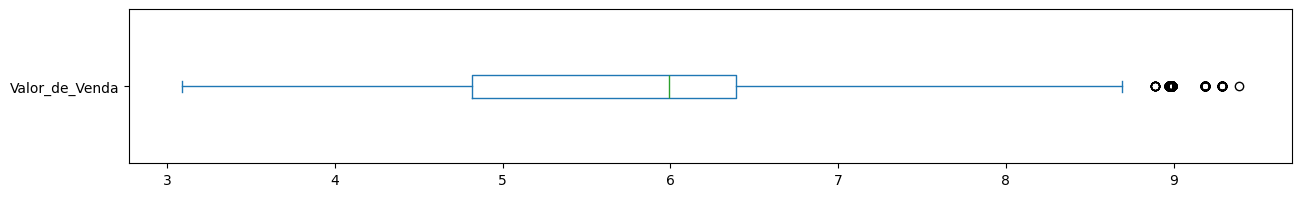

In [21]:
# verificar outliers
df['Valor_de_Venda'].plot.box(vert=False, figsize=(15,2))

- Utilizando o gráfico de BoxPlot para fazer a verificação visual da tabela descritiva acima;
- É possível verificar que a distribuição dos quartis se encaixam nas médias percentuais descritas acima;
- É visivel a presença de anomalias de preços.

- Os outliers amostrados no gráfico possivelmente se devem aos postos de combustíveis com bandeira própria, os quais normalmente não seguem o padrão de tabela da Petrobrás;
- É possível que revendam combustíveis de refinarias privatizadas;
- É possível que o espaço geográfico não seja favorável ao fácil acesso do sistema de logística;
- É possível que tais postos sigam vigências particulares de seus municípios ou estados sobre os impostos de combustíveis.

[Voltar ao índice](#indice)

<a name='section_2'></a>
<font size=6> 2. Qual o preço médio da gasolina e do etanol nesses dois meses?

In [22]:
# Média total por produto citado na tabela
media_por_produto = df.groupby('Produto')['Valor_de_Venda'].mean().round(2)
media_por_produto

,Valor_de_Venda
Produto,
ETANOL,4.40
GASOLINA,6.22
GASOLINA ADITIVADA,6.42


* Aqui está uma amostra da média estática dos dois meses totais, estes valores se comparado às flutuações dos gráficos, são o hipocentro de onde os valores estiveram mais concentrados

[Voltar ao índice](#indice)

<a name='section_3'></a>
<font size=6> 3. Quais os 5 estados com o preço médio da gasolina e do etanol mais caros?

In [23]:
# Realizando filtragem dos produtos citados para verificar os preços médios mais caros

df_gaso_etanol = df[df['Produto'].isin(['GASOLINA', 'ETANOL', 'GASOLINA ADITIVADA'])]
# calculando médias dos estados mais caros
media_combustivel = df_gaso_etanol.groupby(['Sigla_Estado', 'Produto'])['Valor_de_Venda'].mean()
df_precos = media_combustivel.reset_index()
media_gasolina = df_precos[df_precos['Produto'] == 'GASOLINA']
media_etanol = df_precos[df_precos['Produto'] == 'ETANOL']
media_gas_aditivada = df_precos[df_precos['Produto'] == 'GASOLINA ADITIVADA']
top_etanol = media_etanol.sort_values(by='Valor_de_Venda', ascending = False).head(5).round(2)
top_gasolina = media_gasolina.sort_values(by='Valor_de_Venda', ascending = False).head(5).round(2)
top_aditivada = media_gas_aditivada.sort_values(by='Valor_de_Venda', ascending = False).head(5).round(2)

# Atribuir filtragem em DataFrames
df_top_etanol = top_etanol.reset_index(drop=True)
df_top_gasolina = top_gasolina.reset_index(drop=True)
df_top_aditivada = top_aditivada.reset_index(drop=True)

# Combinação dos DataFrames lado a lado
df_combinado = pd.concat([df_top_etanol, df_top_gasolina, df_top_aditivada], axis=1)

# Exibir o DataFrame combinado
df_combinado

,Sigla_Estado,Produto,Valor_de_Venda,Sigla_Estado,Produto,Valor_de_Venda,Sigla_Estado,Produto,Valor_de_Venda
0,AC,ETANOL,5.52,AC,GASOLINA,7.78,AC,GASOLINA ADITIVADA,7.83
1,AM,ETANOL,5.48,AM,GASOLINA,7.25,AM,GASOLINA ADITIVADA,7.27
2,AP,ETANOL,5.37,RR,GASOLINA,6.95,RR,GASOLINA ADITIVADA,7.06
3,CE,ETANOL,5.27,RO,GASOLINA,6.86,RO,GASOLINA ADITIVADA,6.95
4,RR,ETANOL,5.16,SE,GASOLINA,6.59,SE,GASOLINA ADITIVADA,6.68


- Ao examinar o DataFrame é notável que há uma correlação entre os preços da Gasolina e Gasolina Aditivada dos cinco estados, já que são os mesmos e em ordem pareada;
- Os estados do norte são predominantes nas médias mais altas dos preços;
- Isso pode estar relacionado a fatores como distância das refinarias, logística de transporte, tributação estadual, disponibilidade de matéria-prima

[Voltar ao índice](#indice)

<a name='section_4'></a>
<font size=6>Pergunta extra 1. O que justifica a média dos preços dos estados do Norte serem mais caras que o restante das regiões?

  - REAM (Refinaria do Amazonas) foi privatizada, portanto seus valores não dependem do reajuste da Petrobrás, distribuindo a gasolina com o valor mais alto em até 6,5%;
  - REAM atua predominantemente nos estados do Norte;
  - Existe dificuldade no sistema de logística na distribuição dos combustíveis, o que gera maior custo aos fornecedores.

<a name='section_5'></a>
<font size=6> 4. Qual o preço médio do Etanol da Gasolina e Gasolina Aditivada por Estado (BR)?

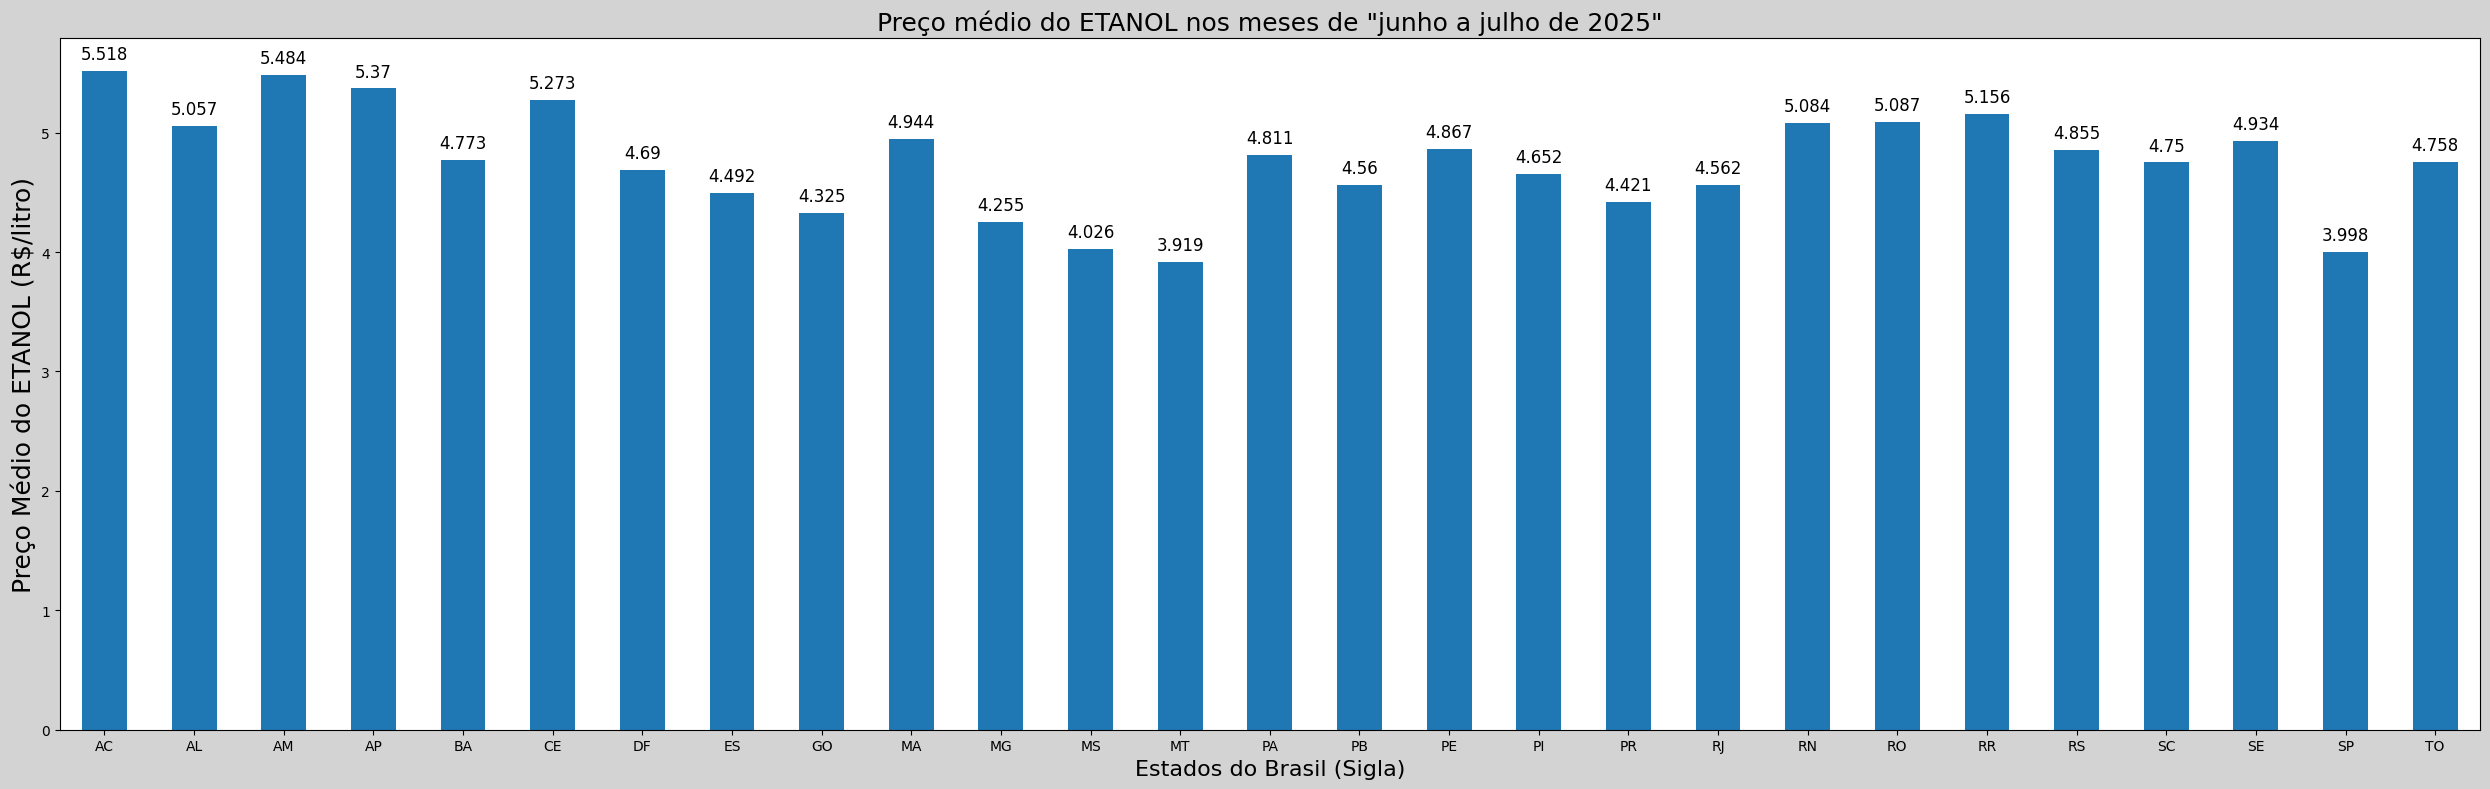

In [25]:
preco_etanol = df[df['Produto'] == 'ETANOL'].groupby('Sigla_Estado')['Valor_de_Venda'].mean().round(3)
preco_etanol


fig, ax = plt.subplots(figsize=(25, 8))
preco_etanol.plot(kind='bar', rot=0 )

for idx , val in enumerate(preco_etanol):
    txt = f'{val}'
    y_coord = val + 0.1
    x_coord = idx # posição de cada barra pode ter um delocamento ex 0.15

    # Adicionar e formatar o texto acima da barra
    ax.text(x=x_coord, y=y_coord, s=txt, fontsize=12, ha='center')

plt.title('Preço médio do ETANOL nos meses de "junho a julho de 2025"', fontsize=18)
plt.xlabel('Estados do Brasil (Sigla)', fontsize=16)
plt.ylabel('Preço Médio do ETANOL (R$/litro)', fontsize=18)
plt.tight_layout()
fig.patch.set_facecolor('lightgray')
plt.show()

- **ETANOL**

- O Etanol nos estado de Amapá 5.48 e Acre 5.51, tiveram os maiores preços médio para o produto nos meses de junho a julho de 2025, E São Paulo e Mato Grosso os menores.

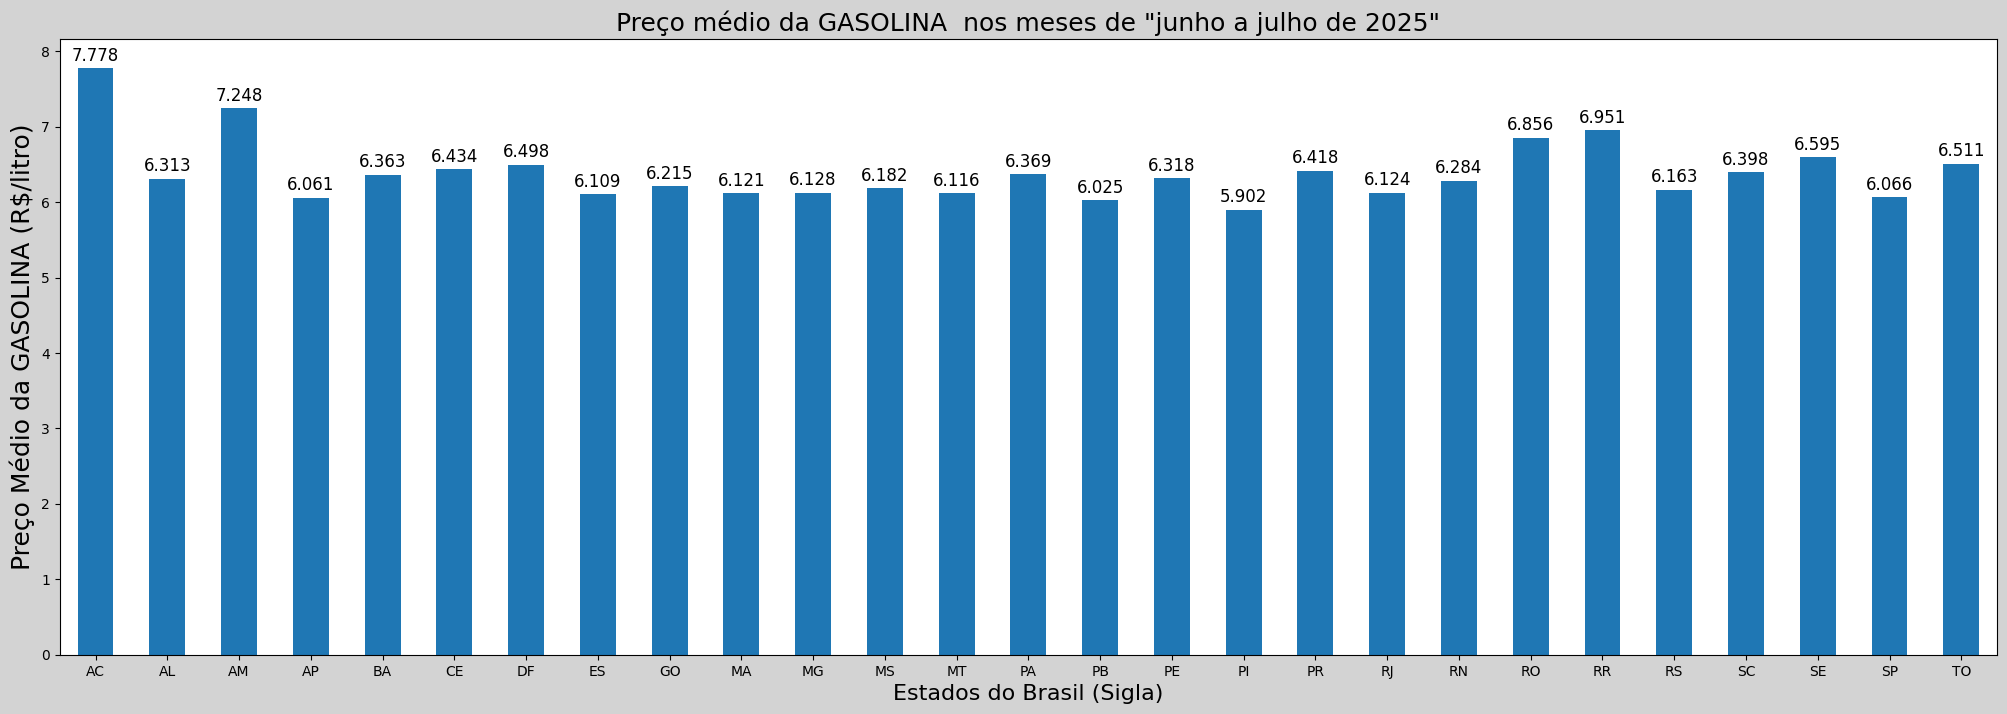

In [27]:
preco_gasolinac = df[df['Produto'] == 'GASOLINA'].groupby('Sigla_Estado')['Valor_de_Venda'].mean().round(3)
preco_gasolinac


fig, ax = plt.subplots(figsize=(25, 8))
preco_gasolinac.plot(kind='bar', rot=0 )

for idx , val in enumerate(preco_gasolinac):
    txt = f'{val}'
    y_coord = val + 0.1
    x_coord = idx

    # Adicionar e formatar o texto acima da barra
    ax.text(x=x_coord, y=y_coord, s=txt, fontsize=12, ha='center')

plt.title('Preço médio da GASOLINA  nos meses de "junho a julho de 2025"', fontsize=18)
plt.xlabel('Estados do Brasil (Sigla)', fontsize=16)
plt.ylabel('Preço Médio da GASOLINA (R$/litro)', fontsize=18)
fig.patch.set_facecolor('lightgray')
plt.show()

- **GASOLINA COMUM**

- Preço médio da Gasolina comum nos meses de junho a julho de 2025, um dos estados que registraram o maior preço para a gasolina foi acre 7.77 seguido do amazonas 7.24

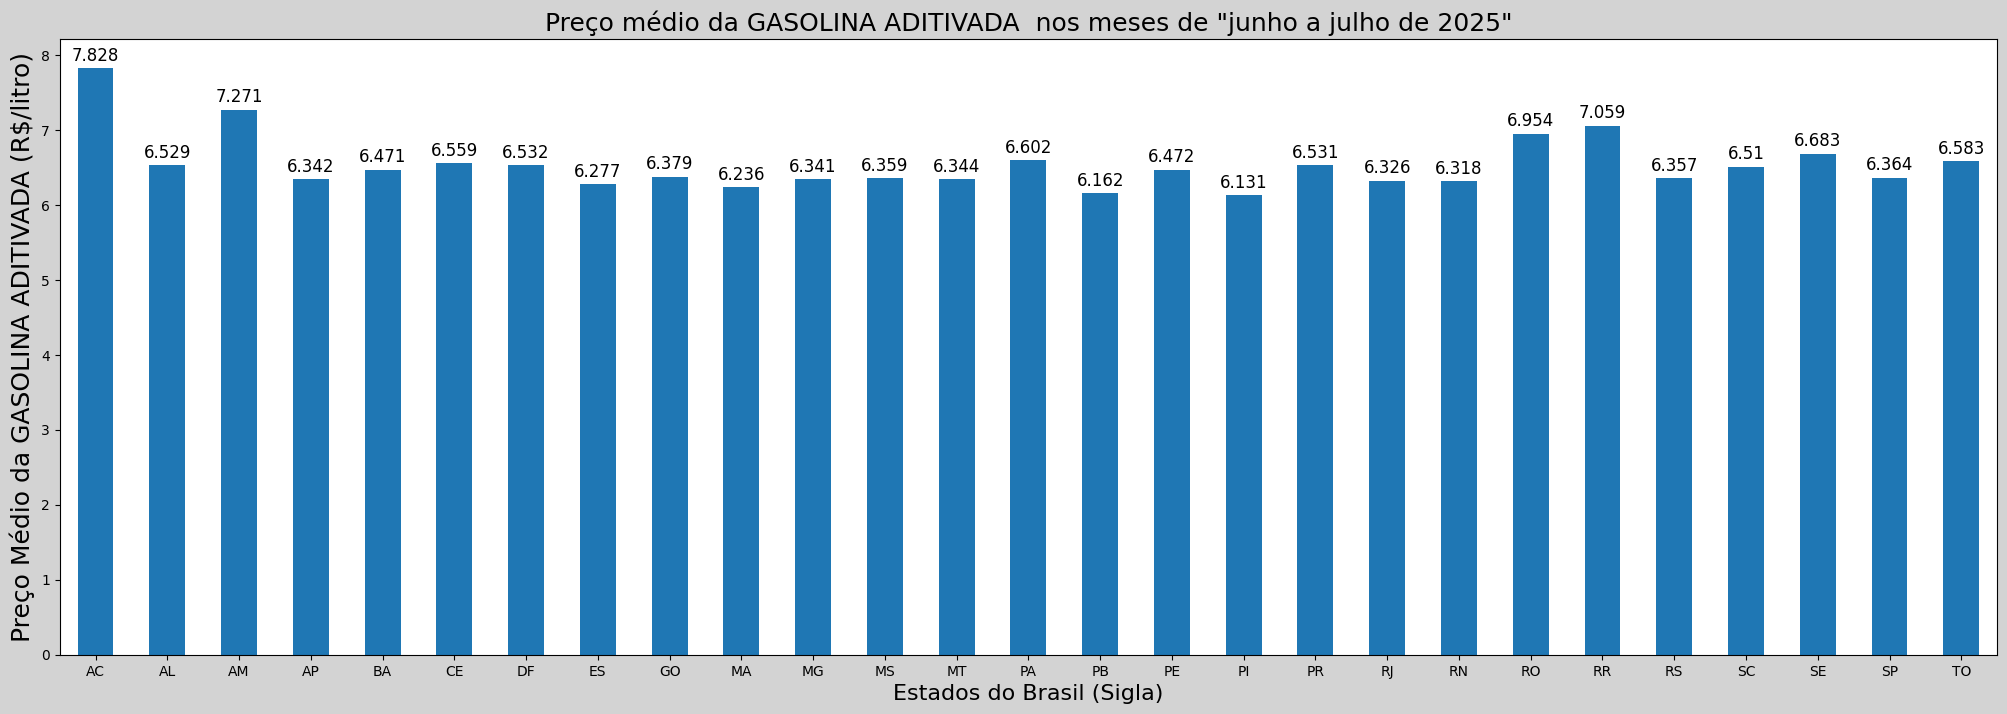

In [28]:
preco_gasolinaad = df[df['Produto'] == 'GASOLINA ADITIVADA'].groupby('Sigla_Estado')['Valor_de_Venda'].mean().round(3)
preco_gasolinaad

fig, ax = plt.subplots(figsize=(25, 8))
preco_gasolinaad.plot(kind='bar', rot=0 )

for idx , val in enumerate(preco_gasolinaad):
    txt = f'{val}'
    y_coord = val + 0.1
    x_coord = idx

    # Adicionar e formatar o texto acima da barra
    ax.text(x=x_coord, y=y_coord, s=txt, fontsize=12, ha='center')

plt.title('Preço médio da GASOLINA ADITIVADA  nos meses de "junho a julho de 2025"', fontsize=18)
plt.xlabel('Estados do Brasil (Sigla)', fontsize=16)
plt.ylabel('Preço Médio da GASOLINA ADITIVADA (R$/litro)', fontsize=18)
fig.patch.set_facecolor('lightgray')
plt.show()

- **GASOLINA ADITIVADA**

- Gasolina Aditivada nos meses de junho a julho de 2025 no estado do acre
indico o maior preço médio para o produto 7.82 seguido do Amazonas com 7.27

- Ao analisar os preços dos combustíveis nos diferentes Estados do Brasil notamos que Amapá, Roraima, Amazonas e Acre tiveram os maiores preços para os produtos nos meses de junho e julho de 2025, diversos fatores podem contribuir para o aumento dos preços do produto um é a distância dos estados para o estado com o maior número de produção dos combustíveis  do país, como São Paulo que é o maior produtor de Etanol, Teve um dos menores preços e é líder na produção de etanol segundo a (SEADE) Sistema Estadual de Análise de Dados (https://www.seade.gov.br/)

[Voltar ao índice](#indice)

<a name='section_6'></a>
<font size=6>5. Qual o município que possui o menor preço para a gasolina e para o etanol?

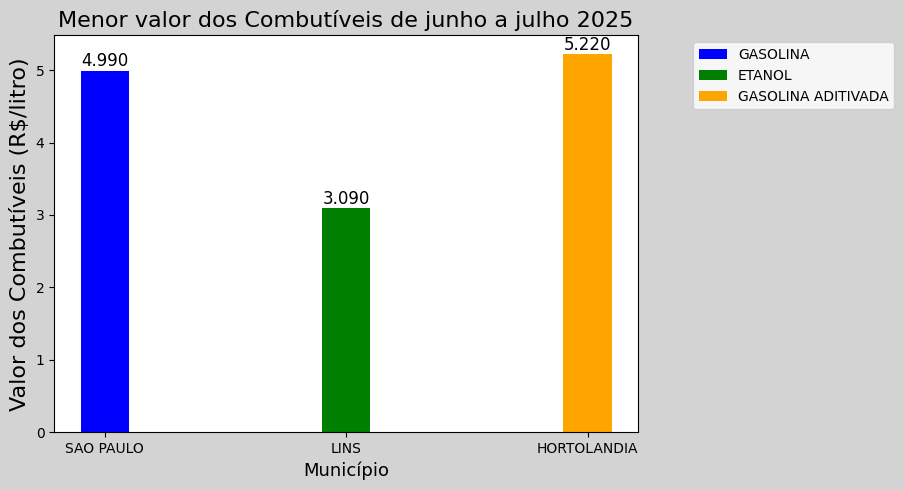

In [30]:
# gráficos
fig, ax = plt.subplots(figsize=(10, 5));

# legendas
plt.xlabel('Município', fontsize=13)
plt.ylabel('Valor dos Combutíveis (R$/litro)', fontsize=16)
plt.title('Menor valor dos Combutíveis de junho a julho 2025', fontsize=16)

#----------------------------------------------------------------------------------------------------------------------------------------------
# filtra menor valor para gasolina comun
menor_gasolinac = tabelas_preco_gasol_etan3[tabelas_preco_gasol_etan3['Produto'] == 'GASOLINA'].groupby('Municipio')['Valor_de_Venda'].min()

# pega o municipio com o menor valor e o menor valor
municipio_menor_valor = menor_gasolinac.idxmin()
valor_menor = menor_gasolinac.min()

# configuração da barra eixo x e eixo y
plt.bar(municipio_menor_valor, valor_menor, color='blue', width=0.2, label = 'GASOLINA')

# coloca o nome do municipio no eixo e e o valor acima do gráfico e suas configurações
plt.text(municipio_menor_valor, valor_menor + 0.01, f'{valor_menor:.3f}', ha='center', va='bottom', fontsize=12)

#--------------------------------------------------------------------------------------------------------------------------------------------------
# filtra menor valor para etanol comun
menor_etanol = tabelas_preco_gasol_etan3[tabelas_preco_gasol_etan3['Produto'] == 'ETANOL'].groupby('Municipio')['Valor_de_Venda'].min()

# pega o municipio com o menor valor e o menor valor
municipio_menor_valor1 = menor_etanol.idxmin()
valor_menor1 = menor_etanol.min()

# configuração da barra eixo x e eixo y
plt.bar(municipio_menor_valor1, valor_menor1, color='Green', width=0.2, label = 'ETANOL')

# coloca o nome do municipio no eixo e e o valor acima do gráfico e suas configurações
plt.text(municipio_menor_valor1, valor_menor1 + 0.01, f'{valor_menor1:.3f}', ha='center', va='bottom', fontsize=12)

#---------------------------------------------------------------------------------------------------------------------------------------------------
menor_gasolina_adit= tabelas_preco_gasol_etan3[tabelas_preco_gasol_etan3['Produto'] == 'GASOLINA ADITIVADA'].groupby('Municipio')['Valor_de_Venda'].min()
municipio_menor_valor2 = menor_gasolina_adit.idxmin()
valor_menor2 = menor_gasolina_adit.min()

# configuração da barra eixo x e eixo y
plt.bar(municipio_menor_valor2, valor_menor2, color='Orange', width=0.2, label = 'GASOLINA ADITIVADA')

# coloca o nome do municipio no eixo e e o valor acima do gráfico e suas configurações
plt.text(municipio_menor_valor2, valor_menor2 + 0.01, f'{valor_menor2:.3f}', ha='center', va='bottom', fontsize=12)
#---------------------------------------------------------------------------------------------------------------------------------------------------

# legenda e suas configurações
plt.legend(ncol=1, loc='upper right', bbox_to_anchor=(1.45, 1))
fig.patch.set_facecolor('lightgray')
# organiza os nomes graficos do layout
plt.tight_layout()
# tira a legenda automática e exibe o gráfico
plt.show()

- **Municípios com os menores preços**

- Os municípios com os menores preços para cada combustível, entre eles estão São Paulo(SP) com a Gasolina de 4.99 Lins como o Etanol de 3.090 e Hortolandia com Gasolina Aditivada de 5.220 o  estado de São Paulo é o maior produtor de Etanol, com a maior Refinaria, a Refinaria de Paulínia (Replan) em capacidade de processamento de petróleo 69 mil m³/dia equivalente a 434 mil barris que é 20% de todo o refino de petróleo na Brasil, fonte (https://petrobras.com.br/)

[Voltar ao índice](#indice)

<a name='section_7'></a>
<font size=6>6. Qual o município que possui o maior preço para a gasolina e para o etanol?

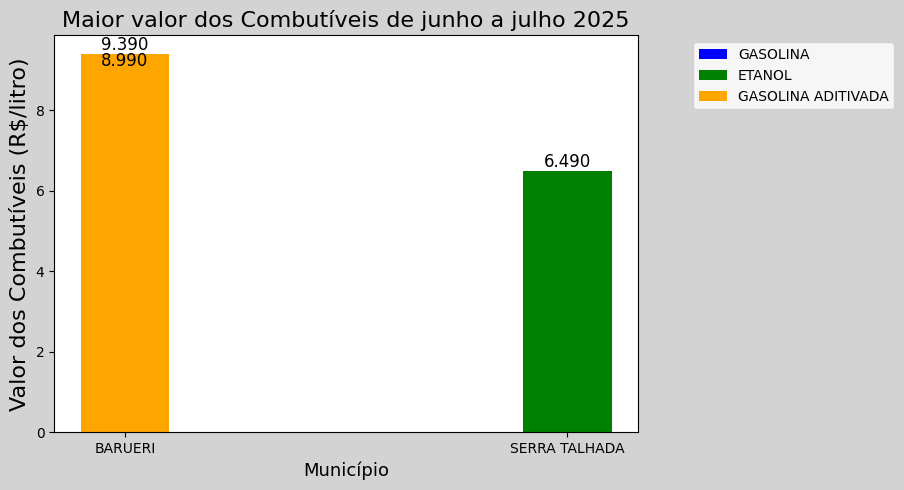

In [31]:
#gráficos
fig, ax = plt.subplots(figsize=(10, 5));

# legendas
plt.xlabel('Município', fontsize=13)
plt.ylabel('Valor dos Combutíveis (R$/litro)', fontsize=16)
plt.title('Maior valor dos Combutíveis de junho a julho 2025', fontsize=16)

#----------------------------------------------------------------------------------------------------------------------------------------------
# filtra maior valor para gasolina comun
maior_gasolinac = tabelas_preco_gasol_etan3[tabelas_preco_gasol_etan3['Produto'] == 'GASOLINA'].groupby('Municipio')['Valor_de_Venda'].max()

# pegar o municipio com o maior valor e o maior valor  menor
municipio_maior_valor = maior_gasolinac.idxmax()
valor_maior = maior_gasolinac.max()

# configuração da barra eixo x e eixo y
plt.bar(municipio_maior_valor, valor_maior, color='blue', width=0.2, label = 'GASOLINA')

# coloca o nome do municipio no eixo e e o valor acima do gráfico e suas configurações
plt.text(municipio_maior_valor, valor_maior + 0.01, f'{valor_maior:.3f}', ha='center', va='bottom', fontsize=12)

#--------------------------------------------------------------------------------------------------------------------------------------------------
# filtra maior valor para etanol aditivada comun
maior_etanol = tabelas_preco_gasol_etan3[tabelas_preco_gasol_etan3['Produto'] == 'ETANOL'].groupby('Municipio')['Valor_de_Venda'].max()

# pegar o municipio com o maior valor e o maior valor  menor
municipio_maior_valor1 = maior_etanol.idxmax()
valor_maior1 = maior_etanol.max()

# configuração da barra eixo x e eixo y
plt.bar(municipio_maior_valor1, valor_maior1, color='Green', width=0.2, label = 'ETANOL')

# coloca o nome do municipio no eixo e e o valor acima do gráfico e suas configurações
plt.text(municipio_maior_valor1, valor_maior1 + 0.01, f'{valor_maior1:.3f}', ha='center', va='bottom', fontsize=12)

#---------------------------------------------------------------------------------------------------------------------------------------------------
# filtra maior valor para gasolina aditivada comun
maior_gasolina_adit= tabelas_preco_gasol_etan3[tabelas_preco_gasol_etan3['Produto'] == 'GASOLINA ADITIVADA'].groupby('Municipio')['Valor_de_Venda'].max()

# pegar o municipio com o maior valor e o maior valor  menor
municipio_maior_valor2 = maior_gasolina_adit.idxmax()
valor_maior2 = maior_gasolina_adit.max()

# configuração da barra eixo x e eixo y
plt.bar(municipio_maior_valor2, valor_maior2, color='Orange', width=0.2, label = 'GASOLINA ADITIVADA')

# coloca o nome do municipio no eixo e e o valor acima do gráfico e suas configurações
plt.text(municipio_maior_valor2, valor_maior2 + 0.01, f'{valor_maior2:.3f}', ha='center', va='bottom', fontsize=12)
#-------------------------------------------------------------------------------------------------------------------------------------------------------

# legenda e suas configurações
plt.legend(ncol=1, loc='upper right', bbox_to_anchor=(1.45, 1))

# organiza os nomes e graficos do layout
plt.tight_layout()
fig.patch.set_facecolor('lightgray')
# tira a legenda automática e exibe o gráfico
plt.show()

- **Municípios com os maiores preços**

- Os municípios com os maiores preços para os combustíveis Baurueri (SP) com 8.99 R$ para Gasolina, Serra talhada com 6.49 para o Etanol e Barueri novamente com 9.390 para a Gasolina Aditivada
- A diversos fatores que pode influenciar nos preços dos combustíveis nos municípios.

[Voltar ao índice](#indice)

<a name='section_8'></a>
<font size=6> 7. Qual a região que possui o maior valor médio da gasolina?

* Gasolina C

O valor médio da gasolina, é maior na região Norte. Tendo valor de R$ 6,703(aproximado).

Enquanto a região Sudeste tem a gasolina mais barata. Com média de R$6,089(aproximado).

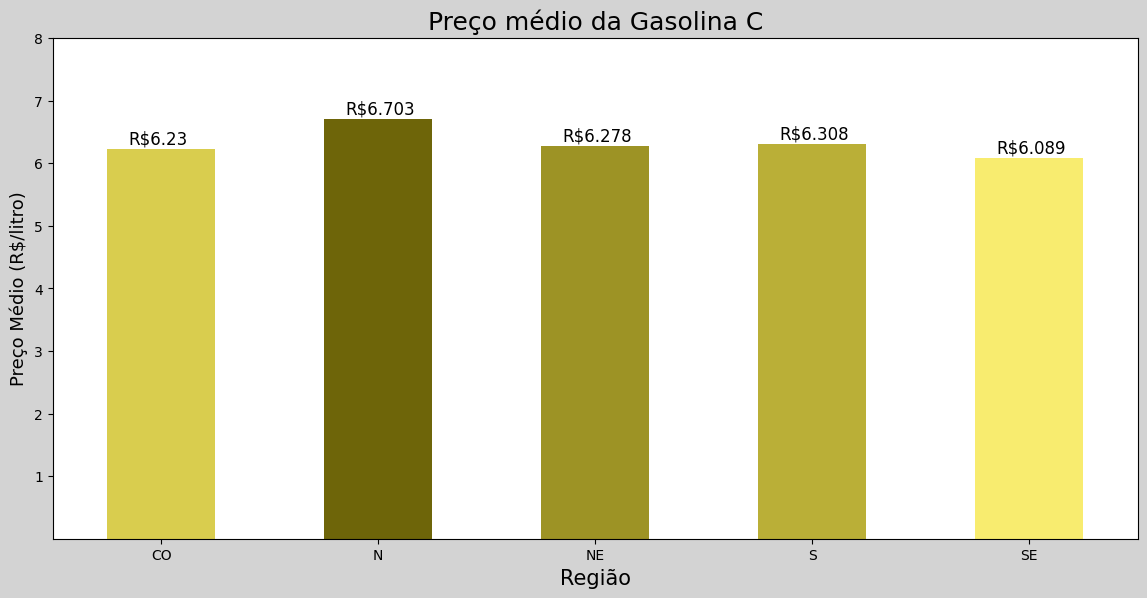

In [32]:
# Extraindo somente os resultados para gasolina.
# Verificando o valor médio por região para a 'Gasolina' e mostrar o resultado.
media_regiao = df[df['Produto'] == 'GASOLINA'].groupby('Sigla_Regiao')['Valor_de_Venda'].mean().round(3)

# Usando o Matplotlib para plotar o gráfico.
fig, ax = plt.subplots(figsize=(14, 6.5))
media_regiao.plot(kind='bar', rot=0, color=['#D9CD4E','#6E6509','#9D9325','#BAAF37','#F8EC6F'] )

# Adicionando valores no topo das barras.
for idx , val in enumerate(media_regiao):
    txt = f'R${val}'
    y_coord = val + 0.08
    x_coord = idx - 0.15
    ax.text(x=x_coord, y=y_coord, s=txt, fontsize=12)

plt.title('Preço médio da Gasolina C', fontsize=18)
plt.xlabel('Região', fontsize=15)
plt.ylabel('Preço Médio (R$/litro)', fontsize=13)
plt.yticks([1,2,3,4,5,6,7,8])
fig.patch.set_facecolor('lightgray')

plt.show()

* Gasolina Aditivada

Obtemos o resultado da gasolina aditivada, também com maior valor médio na região Norte. Tendo seu valor de R$ 6,883(aproximado).

Já a região Centro Oeste conta com a gasolina mais barata. Com média de R$ 6,349(aproximado).

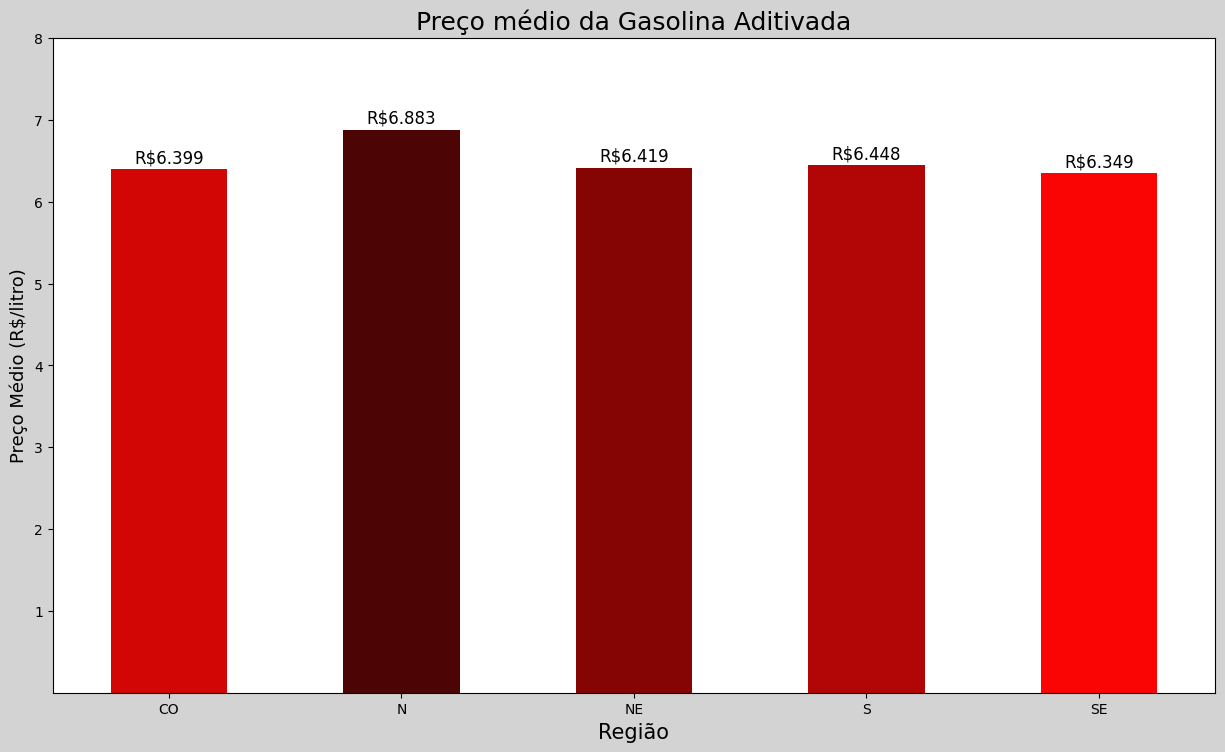

In [33]:
# Extraindo somente os resultados para gasolina aditivada.
# Verificando o valor médio por região para a 'Gasolina Aditivada' e mostrar o resultado.
media_regiao = df[df['Produto'] == 'GASOLINA ADITIVADA'].groupby('Sigla_Regiao')['Valor_de_Venda'].mean().round(3)

# Usando o Matplotlib para plotar o gráfico.
fig, ax = plt.subplots(figsize=(15, 8.5))
media_regiao.plot(kind='bar', rot=0, color=['#D30606','#4d0404','#850404','#B20505','#Fa0404'] )

# Adicionando valores no topo das barras.
for idx , val in enumerate(media_regiao):
    txt = f'R${val}'
    y_coord = val + 0.08
    x_coord = idx - 0.15
    ax.text(x=x_coord, y=y_coord, s=txt, fontsize=12)

plt.title('Preço médio da Gasolina Aditivada', fontsize=18)
plt.xlabel('Região', fontsize=15)
plt.ylabel('Preço Médio (R$/litro)', fontsize=13)
plt.yticks([1,2,3,4,5,6,7,8])
fig.patch.set_facecolor('lightgray')

plt.show()

[Voltar ao índice](#indice)

<a name='section_9'></a>
<font size=6> 8. Qual a região que possui o menor valor médio do etanol?

* Etanol

A região Centro Oeste representa o menor valor médio do Etanol. Com valor de R$ 4,144(aproximado).

Em contra partida o combustível esteve mais caro na região Norte. Com média de R$ 5,075(aproximado).

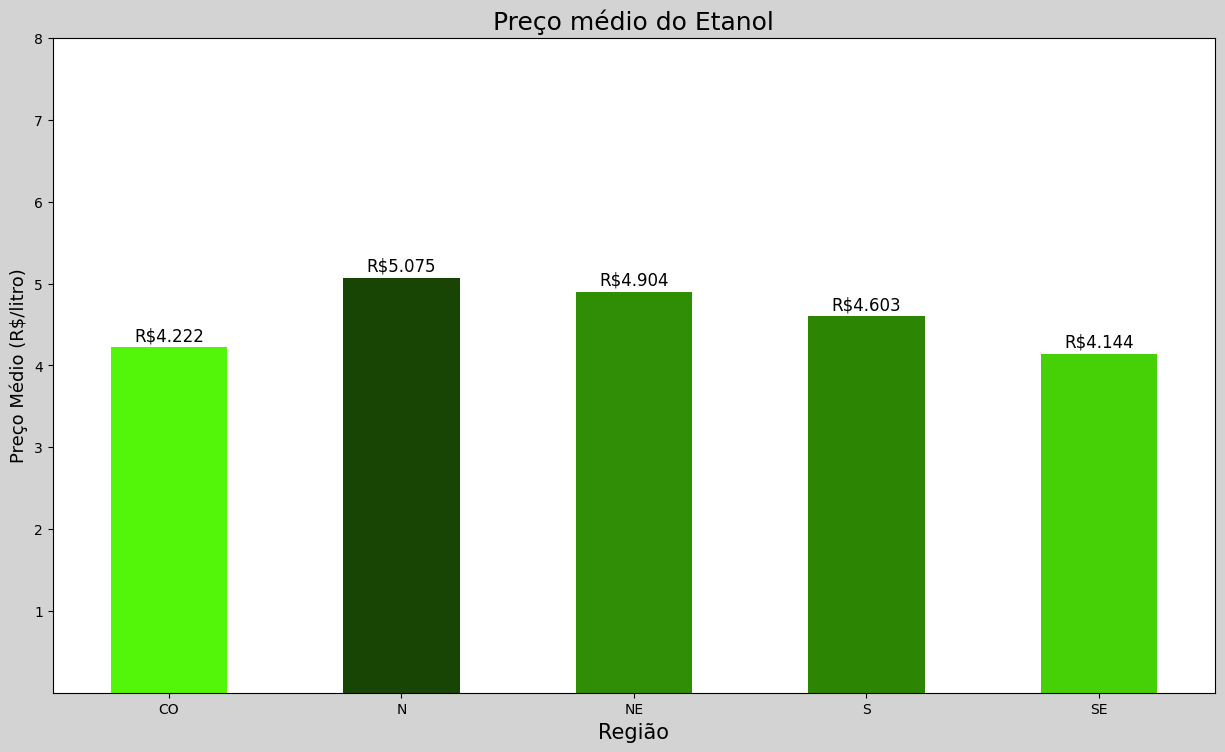

In [34]:
# Extraindo somente os resultados do Etanol.
# Verificando o valor médio por região para o 'Etanol' e mostrar o resultado.
media_regiao = df[df['Produto'] == 'ETANOL'].groupby('Sigla_Regiao')['Valor_de_Venda'].mean().round(3)

# Usando o Matplotlib para plotar o gráfico.
fig, ax = plt.subplots(figsize=(15, 8.5), label='Média referente aos Meses Maio e Junho')
media_regiao.plot(kind='bar', rot=0, color=['#53f609','#184503','#308d06','#2c8503','#46d107'] )

# Adicionando valores no topo das barras.
for idx , val in enumerate(media_regiao):
    txt = f'R${val}'
    y_coord = val + 0.08
    x_coord = idx - 0.15
    ax.text(x=x_coord, y=y_coord, s=txt, fontsize=12)

plt.title('Preço médio do Etanol', fontsize=18)
plt.xlabel('Região', fontsize=15)
plt.ylabel('Preço Médio (R$/litro)', fontsize=13)
plt.yticks([1,2,3,4,5,6,7,8])
fig.patch.set_facecolor('lightgray')

plt.show()

<font size=5>Trecho da publicação da **Folha de São Paulo** de entrevista concedido pelo Presidente da Petrobras em Maio/2023.

No início de Maio o presidente da Petrobras, Jean Paul Prates, confirmou que a empresa anunciará reduções nos preços dos combustíveis na próxima semana. Esse anúncio vem após vazamentos de informações sobre cortes nos preços por parte do governo. A antecipação dessas informações gerou críticas entre os minoritários e o setor de combustíveis, uma vez que muitos adiaram os pedidos de renovação de estoques na expectativa de preços mais baixos. Prates não revelou detalhes específicos sobre a política de preços. A decisão de reduzir os preços está alinhada com a queda das cotações internacionais do petróleo. Atualmente, a gasolina vendida pela Petrobras está R$ 0,39 por litro acima da paridade de importação e o diesel RS0,28 mais caro.


<font size=2>Fonte:https://www.folha.uol.com.br/

[Voltar ao índice](#indice)

<font size=6>9. Há alguma correlação entre o valor do combustível (gasolina e etanol) e a região onde ele é vendido?

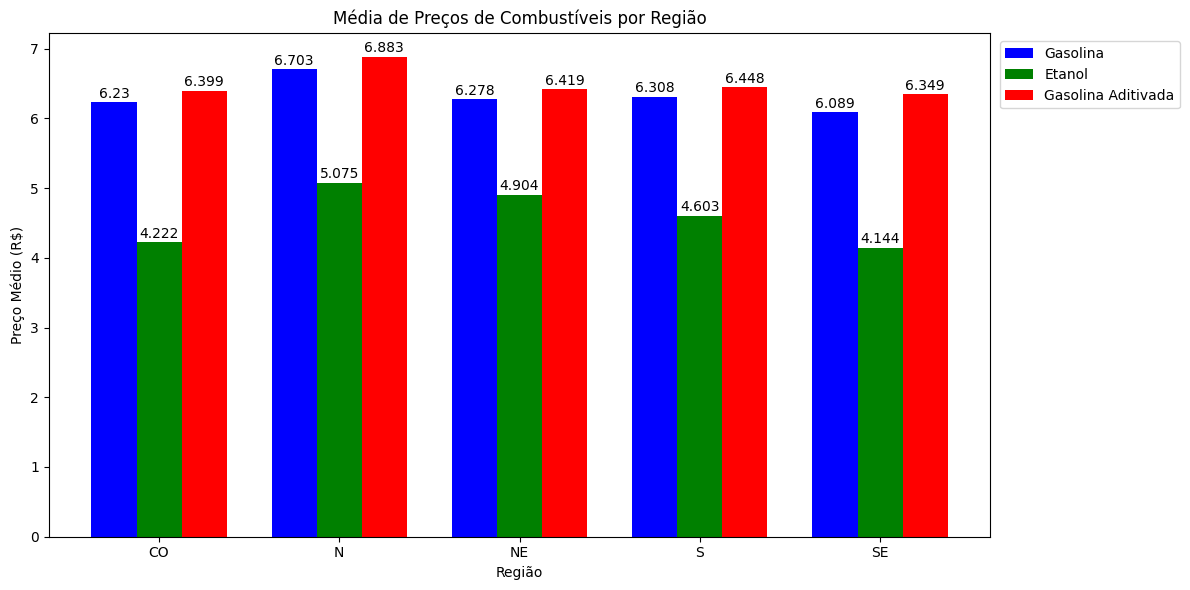

In [35]:
# Calcular a média de preço por região para gasolina, etanol e gasolina aditivada.
md_gasolina = df[df['Produto'] == 'GASOLINA'].groupby('Sigla_Regiao')['Valor_de_Venda'].mean()
md_etanol = df[df['Produto'] == 'ETANOL'].groupby('Sigla_Regiao')['Valor_de_Venda'].mean()
md_gasolina_aditivada = df[df['Produto'] == 'GASOLINA ADITIVADA'].groupby('Sigla_Regiao')['Valor_de_Venda'].mean()

# Configurações de posicionamento das barras
bar_width = 0.25
r1 = np.arange(len(md_gasolina))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Fazendo o gráfico.
plt.figure(figsize=(12,6))

# Barras para a gasolina, etanol e gasolina aditivada
bars_gasolina = plt.bar(r1, md_gasolina.values, width=bar_width, label='Gasolina', color='b')
bars_etanol = plt.bar(r2, md_etanol.values, width=bar_width, label='Etanol', color='g')
bars_gasolina_aditivada = plt.bar(r3, md_gasolina_aditivada.values, width=bar_width, label='Gasolina Aditivada', color='r')

# Adicionar valores no topo das barras para a gasolina
for bar in bars_gasolina:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, round(yval, 3), ha='center', va='bottom')

# Adicionar valores no topo das barras para o etanol
for bar in bars_etanol:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, round(yval, 3), ha='center', va='bottom')

# Adicionar valores no topo das barras para a gasolina aditivada
for bar in bars_gasolina_aditivada:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, round(yval, 3), ha='center', va='bottom')

plt.title('Média de Preços de Combustíveis por Região')
plt.ylabel('Preço Médio (R$)')
plt.xlabel('Região')
plt.xticks([r + bar_width for r in range(len(md_gasolina))], md_gasolina.index)
plt.legend(loc=(1.01,0.85))

plt.tight_layout()
plt.show()


In [36]:
# Calcular a média de preço por região para gasolina e etanol.
md_gasolina = df[df['Produto'] == 'GASOLINA'].groupby('Sigla_Regiao')['Valor_de_Venda'].mean()
md_etanol = df[df['Produto'] == 'ETANOL'].groupby('Sigla_Regiao')['Valor_de_Venda'].mean()

In [37]:
# Calculando a correlação
correlation = md_gasolina.corr(md_etanol)
print(f"Coeficiente de Correlação de Pearson: {correlation:.2f}")

Coeficiente de Correlação de Pearson: 0.82


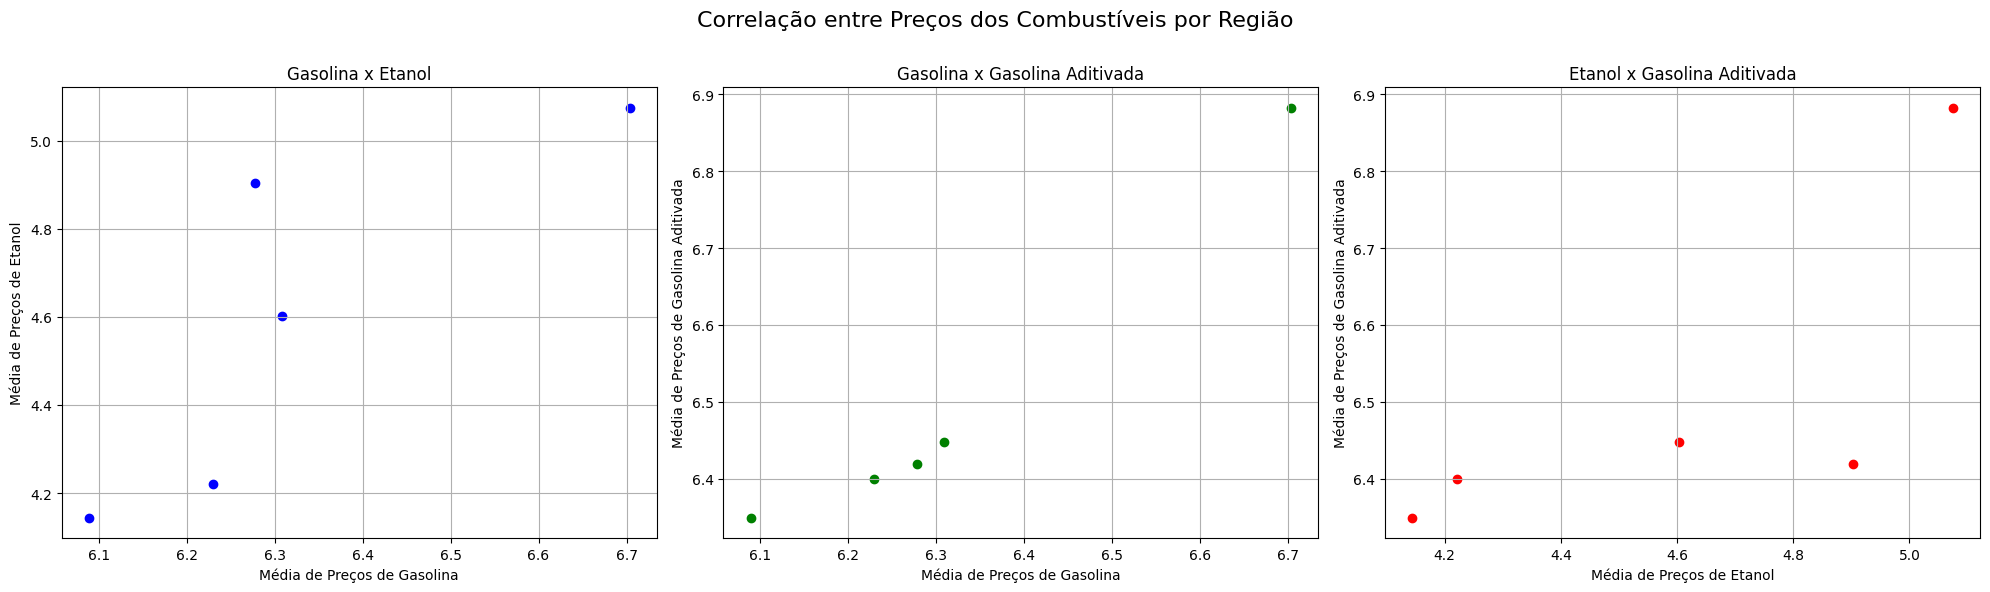

In [38]:
# Configurando a figura e os subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,6))
fig.suptitle('Correlação entre Preços dos Combustíveis por Região', fontsize=16)

# Gasolina e Etanol
axes[0].scatter(md_gasolina, md_etanol, color='blue')
axes[0].set_xlabel('Média de Preços de Gasolina')
axes[0].set_ylabel('Média de Preços de Etanol')
axes[0].set_title('Gasolina x Etanol')
axes[0].grid(True)

# Gasolina e Gasolina Aditivada
axes[1].scatter(md_gasolina, md_gasolina_aditivada, color='green')
axes[1].set_xlabel('Média de Preços de Gasolina')
axes[1].set_ylabel('Média de Preços de Gasolina Aditivada')
axes[1].set_title('Gasolina x Gasolina Aditivada')
axes[1].grid(True)

# Etanol e Gasolina Aditivada
axes[2].scatter(md_etanol, md_gasolina_aditivada, color='red')
axes[2].set_xlabel('Média de Preços de Etanol')
axes[2].set_ylabel('Média de Preços de Gasolina Aditivada')
axes[2].set_title('Etanol x Gasolina Aditivada')
axes[2].grid(True)

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()


<font size=5>**Correlação entre os preços da Gasolina e do Etanol por Região**

Primeiro foi efetuado o cálculo da média para melhor visualizar. O objetivo desta análise foi determinar a relação entre os preços médios da gasolina e do etanol em diferentes regiões.

Os dados foram agrupados por região e calculamos a média de preços para ambos os combustíveis. Em seguida, utilizamos o coeficiente de correlação de Pearson para quantificar a relação entre as médias de preços da gasolina e do etanol.

O coeficiente de correlação de Pearson obtido foi de 0,82.

Um coeficiente de correlação de Pearson de 0,82 sugere uma forte correlação positiva entre os preços da gasolina e do etanol por região. Isso significa que, em geral, regiões que têm preços mais elevados de gasolina também tendem a ter preços mais elevados de etanol, e vice-versa. Um valor de 0,82 é bastante próximo de 1, indicando que essa relação é significativamente forte.

Conclusão:
Os preços da gasolina e do etanol estão fortemente correlacionados entre si em diferentes regiões. Isso pode ser devido a vários fatores, incluindo a dinâmica do mercado local, impostos, logística, entre outros.

<font size=6>10. Há alguma correlação entre o valor do combustível (gasolina e etanol) e a bandeira que vende ele?

In [39]:
# Calcular a média de preço por região para gasolina e etanol.
md_gasolina1 = df[df['Produto'] == 'GASOLINA'].groupby('Bandeira')['Valor_de_Venda'].mean()
md_etanol1 = df[df['Produto'] == 'ETANOL'].groupby('Bandeira')['Valor_de_Venda'].mean()

In [40]:
# Calculando a correlação
correlation1 = md_gasolina1.corr(md_etanol1)
print(f"Coeficiente de Correlação de Pearson: {correlation1:.2f}")

Coeficiente de Correlação de Pearson: 0.73


A correlação de 0.73 sugere que há uma tendência clara de que, quando uma das variáveis sobe, a outra também aumenta, e o contrário também é verdadeiro.

No entanto, é crucial entender que correlação não implica causalidade. Apenas porque duas variáveis estão correlacionadas, isso não significa que uma causa a mudança na outra. Pode haver variáveis ocultas que influenciam ambas ou pode ser coincidência.

<a name='section_12'></a>
<font size=6>Pergunta extra 2. Qual a Bandeira que possui o maior preço para a gasolina e para o etanol?

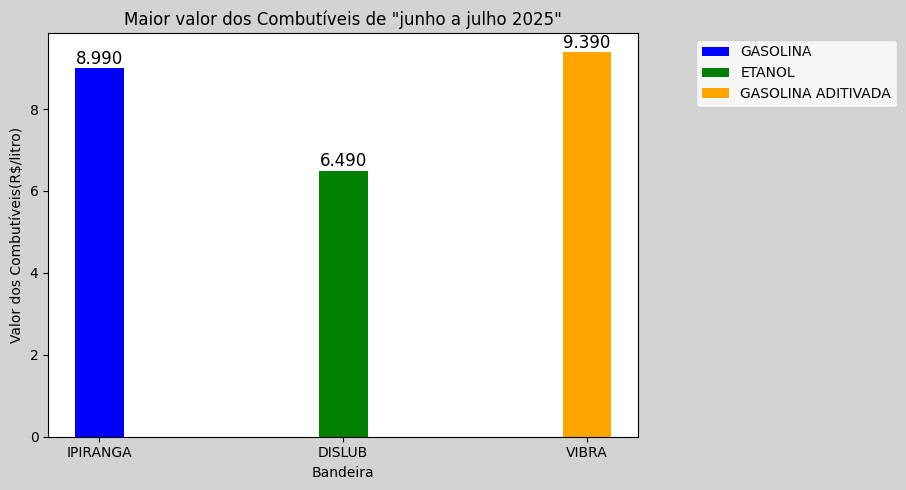

In [42]:
# gráficos
fig, ax = plt.subplots(figsize=(10, 5));

# legendas
plt.xlabel('Bandeira')
plt.ylabel('Valor dos Combutíveis(R$/litro)')
plt.title('Maior valor dos Combutíveis de "junho a julho 2025"')

#----------------------------------------------------------------------------------------------------------------------------------------------
# filtra maior valor para gasolina comun
maior_gasolinac = df[df['Produto'] == 'GASOLINA'].groupby('Bandeira')['Valor_de_Venda'].max()

# pega a bandeira com o maior valor
bandeira_maior_valorb = maior_gasolinac.idxmax()
valor_maiorb = maior_gasolinac.max()

# configuração da barra eixo x e eixo y
plt.bar(bandeira_maior_valorb, valor_maiorb, color='blue', width=0.2, label = 'GASOLINA')

# coloca o nome da bandeira no eixo e e o valor acima do gráfico e suas configurações
plt.text(bandeira_maior_valorb, valor_maiorb + 0.01, f'{valor_maiorb:.3f}', ha='center', va='bottom', fontsize=12)

#--------------------------------------------------------------------------------------------------------------------------------------------------
# filtra maior valor para gasolina comun
maior_etanolb = df[df['Produto'] == 'ETANOL'].groupby('Bandeira')['Valor_de_Venda'].max()

# pega a bandeira com o maior valor
bandeira_maior_valor1b = maior_etanolb.idxmax()
valor_maior1b = maior_etanolb.max()

# configuração da barra eixo x e eixo y
plt.bar(bandeira_maior_valor1b, valor_maior1b, color='Green', width=0.2, label = 'ETANOL')

# coloca o nome do municipio no eixo e e o valor acima do gráfico e suas configurações
plt.text(bandeira_maior_valor1b, valor_maior1b + 0.01, f'{valor_maior1b:.3f}', ha='center', va='bottom', fontsize=12)

#---------------------------------------------------------------------------------------------------------------------------------------------------
# filtra maior valor para gasolina comun
maior_gasolina_aditb= df[df['Produto'] == 'GASOLINA ADITIVADA'].groupby('Bandeira')['Valor_de_Venda'].max()

# pega a bandeira com o maior valor
bandeira_maior_valor2b = maior_gasolina_aditb.idxmax()
valor_maior2b = maior_gasolina_aditb.max()

# configuração da barra eixo x e eixo y
plt.bar(bandeira_maior_valor2b, valor_maior2b, color='Orange', width=0.2, label = 'GASOLINA ADITIVADA')

# coloca o nome do municipio no eixo e e o valor acima do gráfico e suas configurações
plt.text(bandeira_maior_valor2b, valor_maior2b + 0.01, f'{valor_maior2b:.3f}', ha='center', va='bottom', fontsize=12)
#---------------------------------------------------------------------------------------------------------------------------------------------------

# legenda e suas configurações
plt.legend(ncol=1, loc='upper right', bbox_to_anchor=(1.45, 1))

fig.patch.set_facecolor('lightgray')
# organiza os nomes graficos do layout
plt.tight_layout()
# tira a legenda automática e exibe o gráfico
plt.show()

[Voltar ao índice](#indice)

**Bandeiras**

- Bandeiras com os maiores preços para cada combustível, Bandeira branca são postos sem bandeira que compra de grandes distribuidoras nos meses de junho a julho de 2025. A bandeira branca registrou 7.350 na Gasolina comum, a bandeira Ipiranga teve o maior valor para o Etanol de 6.730 e a bandeira Raizen com o valor de 7.990 para a Gasolina Aditivada

## **Conclusão:**

- Ao analisar os preços dos combustíveis nas regiões do país foram identificados diversos fatores para aumento ou queda dos preços dos combustíveis, como localidade de bairros nobre para de baixa renda, localização do município que dificulta a logística e municípios de pontos turísticos
- O monitoramento dos preços dos combustíveis são importante para a economia do país por que reflete diretamente o no bolso do cidadão brasileiro e com seu aumento pode influenciar preços de passagem, aumento dos custos de logística ocasionando preços de alimento mais altos e greves que dificulta o transporte pela região do país

## **Referências:**

- Site (https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/serie-historica-de-precos-de-combustiveis)
- Site (https://www.seade.gov.br/)
- Site (https://pt.wikipedia.org/wiki/Bagé)
- Site (https://pt.wikipedia.org/wiki/Vila_Clementino)
- Site (https://petrobras.com.br/pt/nossas-atividades/principais-operacoes/refinarias/refinaria-de-paulinia-replan.htm)
- Site (https://www1.folha.uol.com.br/mercado/2023/05/inflacao-de-maio-deve-ficar-perto-de-025-apos-petrobras-reduzir-precos.shtml)
- Site (https://amazonasatual.com.br/refinaria-reduz-preco-da-gasolina-em-manaus-e-postos-aumentam-r-030/)
- Site (https://www.brasildefato.com.br/2023/02/23/privatizada-por-bolsonaro-refinaria-do-amazonas-vende-gasolina-mais-cara-do-pais)